In [20]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
from scipy.stats import t
from scipy.stats import f
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# Part I

In [21]:
#  1. inlf                     =1 if in labor force, 1975
#  2. hours                    hours worked, 1975
#  3. kidslt6                  # kids < 6 years
#  4. kidsge6                  # kids 6-18
#  5. age                      woman's age in yrs
#  6. educ                     years of schooling
#  7. wage                     estimated wage from earns., hours
#  8. repwage                  reported wage at interview in 1976
#  9. hushrs                   hours worked by husband, 1975
# 10. husage                   husband's age
# 11. huseduc                  husband's years of schooling
# 12. huswage                  husband's hourly wage, 1975
# 13. faminc                   family income, 1975
# 14. mtr                      fed. marginal tax rate facing woman
# 15. motheduc                 mother's years of schooling
# 16. fatheduc                 father's years of schooling
# 17. unem                     unem. rate in county of resid.
#18. city                     =1 if live in SMSA
# 19. exper                    actual labor mkt exper
# 20. nwifeinc                 (faminc - wage*hours)/1000
# 21. lwage                    log(wage)
# 22. expersq                  exper^2

In [22]:
data = pd.read_csv("MROZ.raw", delim_whitespace=True, header=None)
data = data[data[6]!="."]
data[4] = data[4].astype(int)
data[5] = data[5].astype(int)
data[6] = data[6].astype(float)
data[20] = np.log(data[6])
#age-> 4, educ -> 5, wage -> 6
age = data[4]
educ = data[5]
wage = data[6]

## 2)

### all dataset

### age

In [23]:
age.describe()

count    428.000000
mean      41.971963
std        7.721084
min       30.000000
25%       35.000000
50%       42.000000
75%       47.250000
max       60.000000
Name: 4, dtype: float64

### educ

In [24]:
educ.describe()

count    428.000000
mean      12.658879
std        2.285376
min        5.000000
25%       12.000000
50%       12.000000
75%       14.000000
max       17.000000
Name: 5, dtype: float64

### wage

In [25]:
wage.describe()

count    428.000000
mean       4.177682
std        3.310282
min        0.128200
25%        2.262600
50%        3.481900
75%        4.970750
max       25.000000
Name: 6, dtype: float64

In [26]:
#women with husband wage greater than the median of the all dataset
husb_grt = data[data[11]>wage.median()]

#women with husband wage lower than the median of the all dataset
husb_lwr = data[data[11]<wage.median()]

In [27]:
husb_grt[4].describe()

count    380.000000
mean      41.973684
std        7.674743
min       30.000000
25%       35.000000
50%       43.000000
75%       47.000000
max       60.000000
Name: 4, dtype: float64

In [28]:
husb_grt[5].describe()

count    380.000000
mean      12.684211
std        2.299538
min        5.000000
25%       12.000000
50%       12.000000
75%       14.000000
max       17.000000
Name: 5, dtype: float64

In [29]:
husb_grt[6].describe()

count    380.000000
mean       4.209165
std        3.335807
min        0.128200
25%        2.274725
50%        3.566500
75%        5.089100
max       25.000000
Name: 6, dtype: float64

In [30]:
husb_lwr[4].describe()

count    48.000000
mean     41.958333
std       8.163120
min      30.000000
25%      35.000000
50%      40.500000
75%      49.250000
max      59.000000
Name: 4, dtype: float64

In [31]:
husb_lwr[5].describe()

count    48.000000
mean     12.458333
std       2.182701
min       8.000000
25%      11.750000
50%      12.000000
75%      14.000000
max      16.000000
Name: 5, dtype: float64

In [32]:
husb_lwr[6].describe()

count    48.000000
mean      3.928438
std       3.122774
min       1.201900
25%       2.135750
50%       2.945800
75%       4.352375
max      18.267000
Name: 6, dtype: float64

## 3) Histogram

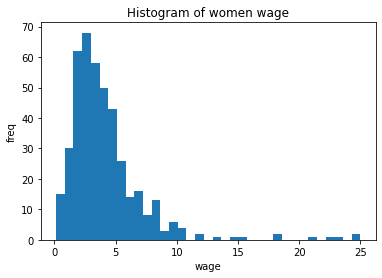

In [33]:
plt.title("Histogram of women wage")
plt.hist(wage,"auto");
plt.xlabel("wage")
plt.ylabel("freq")
plt.savefig("wage.png")

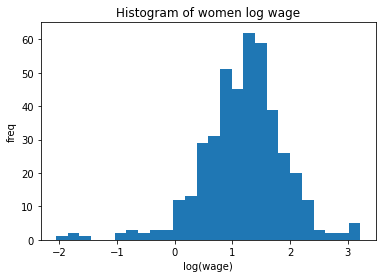

In [34]:
plt.title("Histogram of women log wage")
plt.hist(data[20], "auto");
plt.ylabel("freq")
plt.xlabel("log(wage)")
plt.savefig("logwage.png")

## 4) Correlation between motheduc and fatheduc

In [35]:
educ_mother = data[14]
educ_father = data[15]

corr = np.corrcoef(educ_mother, educ_father)
print("The Pearson coefficent is equal to", (corr[0][1]).round(3))

The Pearson coefficent is equal to 0.554


## 5) Dispersion graphs

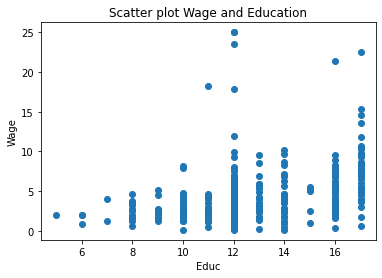

In [36]:
plt.xlabel("Educ")
plt.ylabel("Wage")
plt.title("Scatter plot Wage and Education")
plt.scatter(educ, wage);
plt.savefig("wage-educ.png")

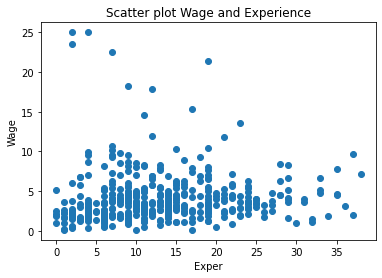

In [37]:
exper = data[18]

plt.xlabel("Exper")
plt.ylabel("Wage")
plt.title("Scatter plot Wage and Experience")
plt.scatter(exper, wage);
plt.savefig("wage-exper.png")

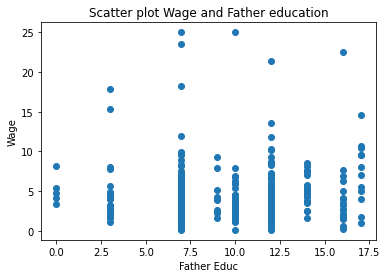

In [38]:
plt.ylabel("Wage")
plt.xlabel("Father Educ")
plt.title("Scatter plot Wage and Father education")
plt.scatter(educ_father, wage);
plt.savefig("wage-fathereduc.png")

## 7)  

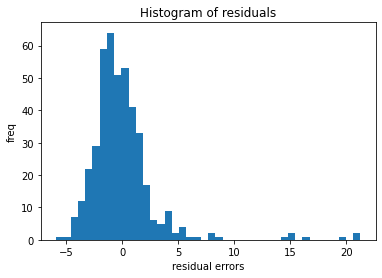

In [39]:
#response variable
y = wage
#const
const = np.ones(np.shape(wage))

#variables
city = data[17]
nwifeinc = data[19]
kidslt6 = data[2]
kidsge6 = data[3]

X = np.column_stack((const, city, educ, exper, nwifeinc, kidslt6, kidsge6))

model = sm.OLS(y,X)
results = model.fit()
plt.hist(results.resid, "auto");
plt.title("Histogram of residuals")
plt.ylabel("freq")
plt.xlabel("residual errors")
plt.savefig("residualerrors.png")

## 8)

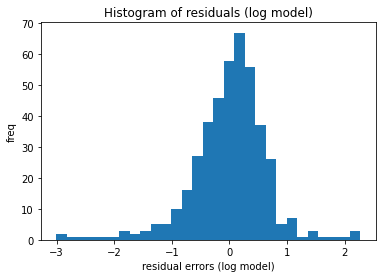

In [40]:
#response variable, now we use the logwage
y = data[20]
#const
const = np.ones(np.shape(wage))

#variables
city = data[17]
nwifeinc = data[19]
kidslt6 = data[2]
kidsge6 = data[3]

X = np.column_stack((const, city, educ, exper, nwifeinc, kidslt6, kidsge6))

model = sm.OLS(y,X)
results = model.fit()
plt.hist(results.resid, "auto");
plt.title("Histogram of residuals (log model)")
plt.ylabel("freq")
plt.xlabel("residual errors (log model)")
plt.savefig("residualerrorslogmodel.png")

## 9)

In [42]:
y_log = data[20]
model = sm.OLS(y_log, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     20   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     12.92
Date:                Fri, 19 Nov 2021   Prob (F-statistic):           2.00e-13
Time:                        09:54:05   Log-Likelihood:                -431.92
No. Observations:                 428   AIC:                             877.8
Df Residuals:                     421   BIC:                             906.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3990      0.207     -1.927      0.0

## 10)

In [43]:
betas = results.params
std = results.bse

n, k = np.shape(X)
t_statistic = (betas[4]-0.01)/std[4]

p_value = 2*(1-t.sf(t_statistic, n-k))
print("The p_value is:", p_value.round(3)*100,"%")

The p_value is: 12.5 %


## 11)

In [44]:
#unconstrained model
u_full = results.resid
SSR0 = u_full.T@u_full


#constrained model
X_constrained = np.column_stack((const, educ, exper, kidslt6, kidsge6))
y_constrained = y_log - 0.01*nwifeinc - 0.05*city

model_constrained = sm.OLS(y_constrained, X_constrained)
results_constrained = model_constrained.fit()
results_constrained.summary()

u = results_constrained.resid
SSR1=u.T@u



F=((SSR1 - SSR0) / 2)/ (SSR0 / (n-k))

print(f"The F-statistic is {F:.3f}, p-value: {f.sf(F,2,n-k):.3f}")
print()

The F-statistic is 1.337, p-value: 0.264



## 12)

                            OLS Regression Results                            
Dep. Variable:                     20   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     12.92
Date:                Fri, 19 Nov 2021   Prob (F-statistic):           2.00e-13
Time:                        09:54:22   Log-Likelihood:                -431.92
No. Observations:                 428   AIC:                             877.8
Df Residuals:                     421   BIC:                             906.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3990      0.207     -1.927      0.0

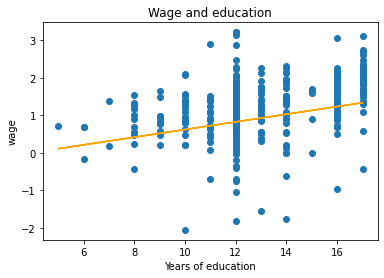

In [45]:
X = np.column_stack((const, city, educ, exper, nwifeinc, kidslt6, kidsge6)) 
y = data[20]
model = sm.OLS(y,X) 
results = model.fit() 
print(results.summary())


plt.scatter(educ, y_log)
plt.xlabel("Years of education")
plt.ylabel("wage")
plt.title("Wage and education")
plt.plot(educ, results.params[0]+results.params[2]*educ, c="orange");
plt.savefig("wageeduc.png")

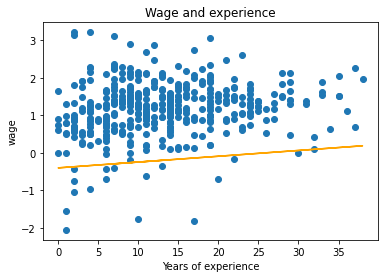

In [46]:
plt.scatter(exper, y_log)

plt.xlabel("Years of experience")
plt.ylabel("wage")
plt.title("Wage and experience")
plt.plot(exper, results.params[0]+results.params[3]*exper, c="orange");
plt.savefig("wageexper.png")

## 13)

In [47]:
kids = kidslt6+kidsge6
X_1 = np.column_stack((const, city, educ, exper, nwifeinc, kidslt6, kids))

model_temp = sm.OLS(y_log, X_1)
results_temp = model_temp.fit()
print(results_temp.summary())
se_joint = results.bse[5]

                            OLS Regression Results                            
Dep. Variable:                     20   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     12.92
Date:                Fri, 19 Nov 2021   Prob (F-statistic):           2.00e-13
Time:                        09:54:33   Log-Likelihood:                -431.92
No. Observations:                 428   AIC:                             877.8
Df Residuals:                     421   BIC:                             906.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3990      0.207     -1.927      0.0

## 14)

In [48]:
#model 7
#rewrite below

y = wage

X = np.column_stack((const, city, educ, exper, nwifeinc, kidslt6, kidsge6))
model_7 = sm.OLS(y, X)
results_7 = model_7.fit()
u_7 = results_7.resid

#to test heteroskedasticity I create a new model with the residual as response variable

y_u = u_7**2

model_het = sm.OLS(y_u, X)
results_het = model_het.fit()
print(results_het.summary())
print("The F-statistic for our test is", results_het.fvalue.round(3))


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.593
Date:                Fri, 19 Nov 2021   Prob (F-statistic):              0.148
Time:                        09:54:42   Log-Likelihood:                -2207.4
No. Observations:                 428   AIC:                             4429.
Df Residuals:                     421   BIC:                             4457.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4856     13.111      0.113      0.9

## 15)

In [49]:
educgt43 = (data[4]>43)*educ
citygt43 = (data[4]>43)*city
expergt43 = (data[4]>43)*exper
nwifeincgt43 = (data[4]>43)*nwifeinc
kidslt6gt43 = (data[4]>43)*kidslt6
kidsge6gt43 = (data[4]>43)*kidsge6

X_changed = np.column_stack((const, educgt43, citygt43, expergt43, nwifeincgt43, kidslt6gt43, kidsge6gt43,
                     city, educ, exper, nwifeinc, kidslt6, kidsge6)) 
n, k = X_changed.shape
model_changed = sm.OLS(y_log, X_changed)
res_changed = model_changed.fit()

SSR0 = res_changed.resid.T@res_changed.resid
SSR1 = results.resid.T@results.resid
((SSR1-SSR0)/6)/(SSR0/(n-k-1)), SSR0, SSR1

(0.918517709191737, 186.11247172752658, 188.58997319394948)

In [50]:
#simple method 
mask_gt = data[4]>43
mask_le = data[4]<=43

X_gt = X[mask_gt]
y_gt = y_log[mask_gt]
model_gt = sm.OLS(y_gt, X_gt)
result_gt = model_gt.fit()
u_gt = result_gt.resid
SSR_gt = u_gt.T@u_gt

X_le = X[mask_le]
y_le = y_log[mask_le]
model_le = sm.OLS(y_le, X_le)
result_le = model_le.fit()
u_le = result_le.resid
SSR_le = u_le.T@u_le

SSRT = SSR_gt + SSR_le

F = ((SSR1-SSRT)/7)/(SSRT/(n-k-1))
p_value = f.sf(F, 7, n-7)
print(f"The F-statistic is {F:.4f}, p-value: {f.sf(F,7,n-7):.4f}")
SSRT

The F-statistic is 0.8260, p-value: 0.5660


185.99225242037733

## 16)

In [51]:
educgt43 = (data[4]>43)*educ
expergt43 = (data[4]>43)*exper

X_16 = np.column_stack((const, educgt43, expergt43, city, educ, exper, nwifeinc, kidslt6, kidsge6)) 
n, k = X_16.shape
model_16 = sm.OLS(y_log, X_16)
res_16 = model_16.fit()

SSR0 = res_16.resid.T@res_16.resid
SSR1 = results.resid.T@results.resid
F_16 = ((SSR1-SSR0)/2)/(SSR0/(n-k-1))
SSR0, F_16, f.sf(F_16, 2, n-2)
print(f"The F-statistic is {F_16:.4f}, p-value: {f.sf(F_16,2,n-2):.4f}")

The F-statistic is 2.1026, p-value: 0.1234


# Part II

In [52]:
df = pd.read_excel("quarterly.xls")

In [53]:
df.head()

,DATE,FFR,Tbill,Tb1yr,r5,r10,PPINSA,Finished,CPI,CPICORE,M1NSA,M2SA,M2NSA,Unemp,IndProd,RGDP,Potent,Deflator,Curr
0,1960Q1,3.93,3.87,4.57,4.64,4.49,31.67,33.20,29.40,18.92,140.53,896.1,299.40,5.13,23.93,2845.3,2824.2,18.521,31.830
1,1960Q2,3.70,2.99,3.87,4.30,4.26,31.73,33.40,29.57,19.00,138.40,903.3,300.03,5.23,23.41,2832.0,2851.2,18.579,31.862
2,1960Q3,2.94,2.36,3.07,3.67,3.83,31.63,33.43,29.59,19.07,139.60,919.4,305.50,5.53,23.02,2836.6,2878.7,18.648,32.217
3,1960Q4,2.30,2.31,2.99,3.75,3.89,31.70,33.67,29.78,19.14,142.67,932.8,312.30,6.27,22.47,2800.2,2906.7,18.700,32.624
4,1961Q1,2.00,2.35,2.87,3.64,3.79,31.80,33.63,29.84,19.17,142.23,948.9,317.10,6.80,22.13,2816.9,2934.8,18.743,32.073


In [54]:
print(df.isna().sum())

DATE        0
FFR         0
Tbill       0
Tb1yr       0
r5          0
r10         0
PPINSA      0
Finished    0
CPI         0
CPICORE     0
M1NSA       0
M2SA        0
M2NSA       0
Unemp       0
IndProd     0
RGDP        0
Potent      0
Deflator    0
Curr        0
dtype: int64


In [55]:
inf = []
for i in range(1,len(df)):
    inf +=  [ 100 * (4 * ( (df["CPI"][i]-df["CPI"][i-1]) / df["CPI"][i-1]) ) ]

df_n = df[1:len(inf)+1]

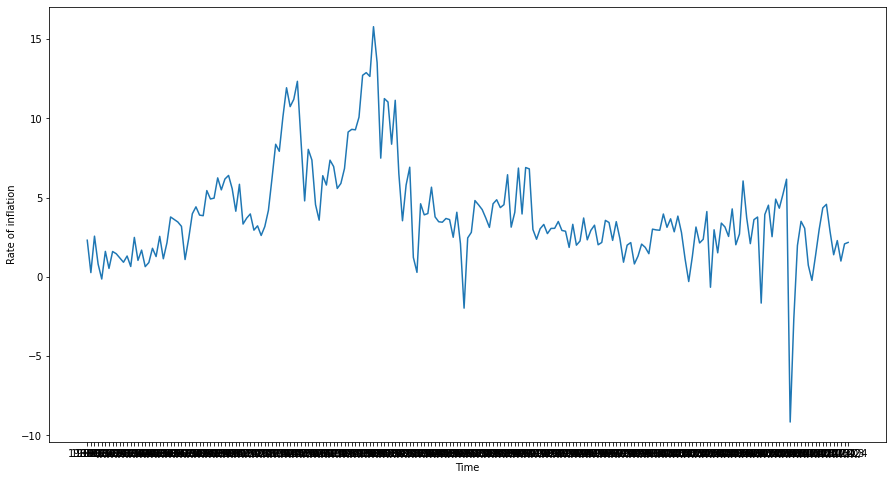

In [56]:
year = df_n['DATE']
plt.figure(figsize=(15,8))
plt.plot(year,inf)
plt.ylabel("Rate of inflation")
plt.xlabel("Time")
plt.savefig("inflation_rate.png")

## 3)

<Figure size 432x288 with 0 Axes>

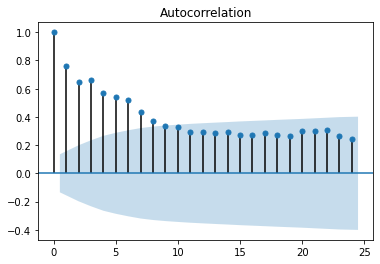

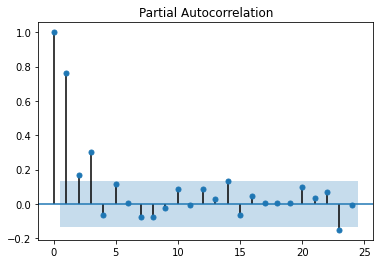

In [57]:
""" plot autocorrelation """
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(1)
plot_acf(np.array(inf))
plt.savefig("autocorrelation.png")

""" plot partial autocorrelation """
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(2)
plot_pacf(np.array(inf))
plt.savefig("partialautocorrelation.png")


**AUTOCORRELATION**

We can calculate the correlation for time series observations with observations with previous time steps, called lags. Because the correlation of time series observations is calculated with values of the same at previous time, this is called **autocorrelation**.
Confidence intervals are drawn a a cone. By default, this is set to 95% confidence interval, suggesting that correlation values outside of this cone are very likely a correlation and not a statistical fluke.


**PARTIAL AUTOCORRELATION**

"The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags".

The autocorrelation for an observation and an observation at a prior time step is comprised of both the direct and the indirect correlations. These indirect correlations are a linear function of the correlation of the observation, with observations at intervening time steps. It is these indirect correlations that the partial autocorrelation function seeks to remove.



**How to interpret these graphs?**

We know that the ACF describes the autocorrelation between an observation and another observation at a prior time step that includes direct and indirect dependence information.

This means we would expect the ACF for the AR(k) time series to be strong to a lag of k and the inertia of that relationship would carry on to subsequent lag values, trailing off at some point as the effect was weakened.

We know that the PACF only describes the direct relationship between an observation and its lag. This would suggest that there would be no correlation for lag values beyond k.

## 4)

**STATIONARY**

A stationary time series process is one whose probability distributions are stable over time in the following sense: if we take any collection of random variables in the sequence and then shift that sequence ahead h time periods, the joint probability distribution must remain unchanged.

**How is stationarity used in time series econometrics?**

On a pratical level, if we want to understand the relationship between two or more variables using regression analysis, we need to assume some sort of stability over time. If we allow the relationship between to change arbitrarily in each time period, then we cannot hope to learn much about how a change in one variable affects the other variable if we only have access to a single time series realization.

**ERGODICITY**

With ergodicity, we are asking our process to move around the average, taking values all over its support. Otherwise, the risk of having a biased mean, tending towards the ‘area’ where the process is stuck, is high.

## 5)

In [58]:
import statsmodels.tsa.api as smt

for i in range(1,11):
  mdl = smt.AR(inf).fit(maxlag=i)
  mdl.aic, mdl.bic
  print(f"order {i} - AIC {mdl.aic}")

order 1 - AIC 1.417897947411437
order 2 - AIC 1.3954288743310164
order 3 - AIC 1.3147211279283673
order 4 - AIC 1.320651115255999
order 5 - AIC 1.319277809326233
order 6 - AIC 1.3341763040907433
order 7 - AIC 1.3421628181319731
order 8 - AIC 1.3507619490897187
order 9 - AIC 1.3648260444391345
order 10 - AIC 1.3718938232009443


We chose the model who minimizes the AIC score: the best model is $AR(3)$.

## 6) Phillips curve model

$unemp_t = \beta_0 + \beta_1*inf_t $

In [59]:
unemp = df["Unemp"]
n = df.shape[0]
unemp = unemp[1:n]

const = np.ones(len(unemp))
X = np.column_stack((const,inf))
y = unemp

                            OLS Regression Results                            
Dep. Variable:                  Unemp   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.01214
Date:                Fri, 19 Nov 2021   Prob (F-statistic):              0.912
Time:                        09:56:11   Log-Likelihood:                -400.28
No. Observations:                 211   AIC:                             804.6
Df Residuals:                     209   BIC:                             811.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0708      0.181     33.576      0.0

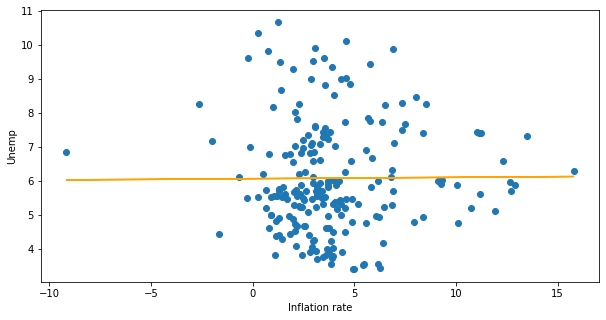

In [60]:
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())
u = results.resid
plt.figure(figsize=(10,5))

plt.scatter(inf,unemp)
plt.xlabel("Inflation rate")
plt.ylabel("Unemp")
inf = np.array(inf)
plt.plot(inf,results.params[0] + (results.params[1]*inf), color = 'orange')

## 7) Test the autocorrelation of errors

We test the autocorrelation of the errors by testing the hypothesis $H_0: \rho = 0 $ in the equation $u_t = \rho*u_{t-1} +v $.

In [61]:
n = len(u)
u_1 = u[0:n-1]
const = np.ones(n-1)
X = np.column_stack((const,u_1))
X = X[:,1]
y = u[1:n]
model = sm.OLS(y,X)
results1 = model.fit()
print(results1.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              4557.
Date:                Fri, 19 Nov 2021   Prob (F-statistic):                   6.88e-144
Time:                        09:56:31   Log-Likelihood:                         -70.409
No. Observations:                 210   AIC:                                      142.8
Df Residuals:                     209   BIC:                                      146.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [62]:
coef = results1.params[0]
stderr = 0.045
n, k = X.shape[0], 1
from scipy.stats import t
print(f"T-statistic : {coef/stderr:.3f}, p-value: {2*t.sf(coef/stderr,n-k):.3f}")

T-statistic : 21.776, p-value: 0.000


The tstatistic is **t=21.776**. The pvalue is 0. We reject $H_0$ at 1%. We have errors autocorrelation.

## 8) Correct the autocorrelation error using methods seen in the course

We can use the transformation $inf(t)-\rho*inf(t-1) $ and $unemp(t)-\rho*unemp(t-1)$.

In [63]:
rho = results1.params[0]
print(rho)
n = len(inf)

inf_n = np.array(inf[1:n])
unemp_n = np.array(unemp[1:n])

inf_1 = rho*np.array(inf[0:n-1])
unemp_1 = rho*np.array(unemp[0:n-1])

y = unemp_n - unemp_1
X_un = inf_n - inf_1

const = (1-rho)*np.ones(n-1)
X = np.column_stack((const,X_un))
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

0.979923779970792
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     5.203
Date:                Fri, 19 Nov 2021   Prob (F-statistic):             0.0236
Time:                        09:56:38   Log-Likelihood:                -66.797
No. Observations:                 210   AIC:                             137.6
Df Residuals:                     208   BIC:                             144.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             6.7924      1.149  

## 9) Test the stability of the unemployment-inflation relationship over two sub-periods of identical size (test of change in structure before and after half of the observation period)

                            OLS Regression Results                            
Dep. Variable:                  Unemp   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.6523
Date:                Fri, 19 Nov 2021   Prob (F-statistic):              0.421
Time:                        09:56:42   Log-Likelihood:                -205.79
No. Observations:                 106   AIC:                             415.6
Df Residuals:                     104   BIC:                             420.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.9554      0.285     20.928      0.0

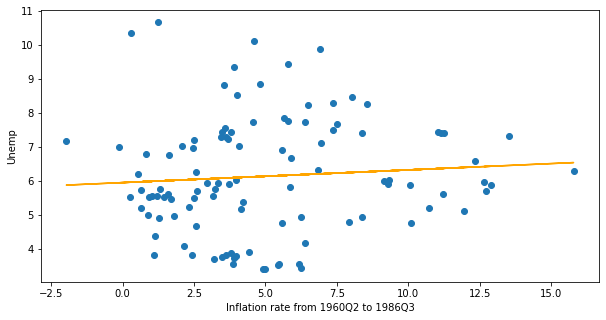

In [64]:
""" split the dataset in two sub-periods of identical size """

len = df.shape[0]
n = int(len/2)
inf = np.array(inf)

y_1 = df["Unemp"][1:n+1]
const_1 = np.ones(np.shape(y_1))
inf_1 = inf[0:n] 
X_1 = np.column_stack((const_1,inf_1))

model1 = sm.OLS(y_1,X_1)
results1 = model1.fit()
print(results1.summary())

plt.figure(1,figsize=(10,5))
plt.scatter(inf_1,y_1)
plt.xlabel("Inflation rate from 1960Q2 to 1986Q3")
plt.ylabel("Unemp")
plt.plot(inf_1,results1.params[0] + (results1.params[1]*inf_1), color = 'orange')
plt.savefig("firstpart.png")

                            OLS Regression Results                            
Dep. Variable:                  Unemp   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     3.251
Date:                Fri, 19 Nov 2021   Prob (F-statistic):             0.0743
Time:                        09:56:52   Log-Likelihood:                -191.85
No. Observations:                 105   AIC:                             387.7
Df Residuals:                     103   BIC:                             393.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4161      0.260     24.639      0.0

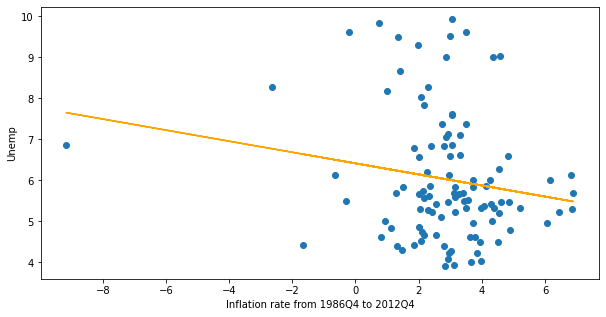

In [65]:
y_2 = df["Unemp"][n+1::]
const_2 = np.ones(np.shape(y_2))
inf_2 = inf[n::] 
X_2 = np.column_stack((const_2,inf_2))

model2 = sm.OLS(y_2,X_2)
results2 = model2.fit()
print(results2.summary())

plt.figure(1,figsize=(10,5))
plt.scatter(inf_2,y_2)
plt.xlabel("Inflation rate from 1986Q4 to 2012Q4")
plt.ylabel("Unemp")
plt.plot(inf_2,results2.params[0] + (results2.params[1]*inf_2), color = 'orange')
plt.savefig("secondpart.png")

The relation is not stable.

## 10) 

In [66]:
""" model with inflation and unemployment (lag 4) """
n = df.shape[0]
unemp = df["Unemp"][1:n]
inf = inf

inf_1 = inf[3:n-2]
inf_2 = inf[2:n-3]
inf_3 = inf[1:n-4]
inf_4 = inf[0:n-5]

unemp_1 = unemp[3:n-2]
unemp_2 = unemp[2:n-3]
unemp_3 = unemp[1:n-4]
unemp_4 = unemp[0:n-5]
y = unemp[4:n]

const = np.ones(np.shape(y))

# print(inf_1.shape,inf_2.shape,inf_3.shape, inf_4.shape, const.shape)
""" unrestricted model """
X = np.column_stack((const,inf_1,inf_2,inf_3,inf_4,unemp_1,unemp_2,unemp_3,unemp_4))
X0=X
n,k = X.shape

model = sm.OLS(y,X)
results = model.fit()
res = results
print(results.summary())
u = results.resid
SSR0 = u.T@u
print(SSR0)

""" restricted model """
X = np.column_stack((const,unemp_1,unemp_2,unemp_3,unemp_4))

model = sm.OLS(y,X)
results1 = model.fit()
print(results1.summary())
u = results1.resid
SSR1 = u.T@u
print(SSR1)

F = ( (SSR1-SSR0) / 4 ) / ( SSR0/ (n-8-1) )
pv = f.sf(F,4,n-8)
print(f"Fstatistic:{F:.4f}, pvalue: {pv:.4f}")

                            OLS Regression Results                            
Dep. Variable:                  Unemp   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     1145.
Date:                Fri, 19 Nov 2021   Prob (F-statistic):          2.80e-161
Time:                        09:56:56   Log-Likelihood:                 4.6497
No. Observations:                 207   AIC:                             8.701
Df Residuals:                     198   BIC:                             38.70
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1457      0.072      2.014      0.0

## 11)

The long term impact is 0.023


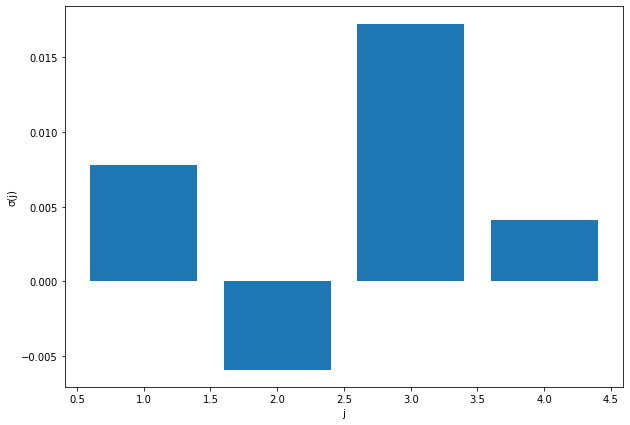

In [68]:
""" lag distribution """
x = [1,2,3,4]
d_inf = [results.params[1], results.params[2], results.params[3], results.params[4]]
plt.figure(figsize=(10,7))
plt.bar(x,d_inf)
plt.xlabel("j")
plt.ylabel("σ(j)")
plt.savefig("lagditr.png")
""" long term impact """
LRP = results.params[1:5].sum()
print(f"The long term impact is {LRP:.3f}")